# How to use `scivision`

In this notebook, we will:

1. Demonstrate using the scivision [Python API](https://scivision.readthedocs.io/en/latest/api.html) to load a pretrained (ImageNet) model, which we previously added to the scivision catalog with the name "scivision_classifier", as per [this guide](https://scivision.readthedocs.io/en/latest/contributing.html#extending-the-scivision-catalog)
2. Use the scivision catalog to find a matching dataset, which the model can be run on
3. Run the model on the data, performing simple model inference

Note: The model repository follows the strcuture specified in [this template](https://scivision.readthedocs.io/en/latest/model_repository_template.html), including a `scivision` [model config file](https://github.com/alan-turing-institute/scivision-test-plugin/blob/main/.scivision/model.yml).

We first import some things from scivision: `default_catalog` is a scivision **catalog** that will let us discover models and datasets, and `load_pretrained_model` provides a convenient way to load and run a model.

In [1]:
from scivision import default_catalog, load_pretrained_model

## Inspecting our model in the scivision catalog

A scivision catalog is a collection of **models** and **datasources**.

For this example, we want to find datasources compatible with "scivision_classifier".  But first, let's first let's use the catalog to retrive the "scivision_classifier" repository url and take a look at the other models in the *default catalog* (the built-in catalog, distributed as part of scivision) and see how this catalog is structured.

In [2]:
# Get the model repo url
models_catalog = default_catalog.models.to_dataframe()
model_repo = models_catalog[models_catalog.name == "scivision_classifier"].url.item()
model_repo # Why not paste the repo link into your browser and see how it looks?

AnyUrl('https://github.com/alan-turing-institute/scivision_classifier', scheme='https', host='github.com', tld='com', host_type='domain', path='/alan-turing-institute/scivision_classifier')

In [3]:
# Inspecting model entry and its metadata in the default catalog
models_catalog[models_catalog.name == "scivision_classifier"]

,name,description,tasks,url,pkg_url,format,pretrained,labels_required,institution,tags
8,scivision_classifier,None,"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/scivi...,git+https://github.com/alan-turing-institute/s...,image,True,False,"(alan-turing-institute,)","(classification, 2D, image)"


## Loading the model

Some model entries in the scivision catalog contain a single loadable model. Here, let's load the "scivision_classifier" entry, which contains each of the models in the [image-classifiers](https://pypi.org/project/image-classifiers/) package, using the scivision python API. We can do this with the `load_pretrained_model` function, in this case specifying the "resnet18" model (note the "model" arg is not mandatory and will have a default value for any model catalog entries that have more than one model):

In [4]:
model = load_pretrained_model(model_repo, allow_install=True, model='resnet18')

  Cloning https://github.com/alan-turing-institute/scivision_classifier (to revision main) to /private/var/folders/kf/72snt1z56h56smb3y7c0dxpr9rwb6q/T/pip-install-9uu_yw1h/scivision-classifier_05d02d3a62e049a39642bd7b877870c6


  Running command git clone --filter=blob:none --quiet https://github.com/alan-turing-institute/scivision_classifier /private/var/folders/kf/72snt1z56h56smb3y7c0dxpr9rwb6q/T/pip-install-9uu_yw1h/scivision-classifier_05d02d3a62e049a39642bd7b877870c6


  Resolved https://github.com/alan-turing-institute/scivision_classifier to commit 9ae8cd11232ffd1bddcbcb0a7bbf1172028570ef
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scivision_classifier: filename=scivision_classifier-0.0.1-py3-none-any.whl size=3883 sha256=eac35cd4715571448ffcd6c3ad6d9937512ad26180a5fcaa8f41e2170cbbcb33
  Stored in directory: /private/var/folders/kf/72snt1z56h56smb3y7c0dxpr9rwb6q/T/pip-ephem-wheel-cache-k_b6xugd/wheels/af/27/f9/5c32ecec2f2682373da54294d060008ca1d046e18d74187784
Successfully built scivision_classifier
  Attempting uninstall: scivision_classifier
    Found existing installation: scivision-classifier 0.0.1
    Uninstalling scivision-classifier-0.0.1:
      Successfully uninstalled scivision-classifier-0.0.1


2022-05-09 17:36:09.783584: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# let's explore the model object
model

scivision.PretrainedModel( 
  module='scivision_classifier', 
  model='resnet18', 
  source='https://github.com/alan-turing-institute/scivision_classifier' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "image: numpy.ndarray">)' 
)

Later, we'll use this ImageNet model to make predictions on image data found in the scivision catalog.

## Query the default scivision catalog

Now let's use the `default_catalog` to identify datasources in the catalog that are compatible with the model (based on `tasks`, `format` and `labels_provided`/`labels_required`).

In [6]:
compatible_datasources = default_catalog.compatible_datasources("scivision_classifier").to_dataframe()
compatible_datasources

,name,description,tasks,domains,url,format,labels_provided,institution,tags
2,data-002,None,"(TaskEnum.classificiation,)","(oceanography,)",https://github.com/scotthosking/intake-plankto...,image,True,"(CEFAS,)","(help-needed, 2D)"
3,data-003,Koala,"(TaskEnum.object_detection, TaskEnum.classific...","(computer-vision,)",https://github.com/alan-turing-institute/scivi...,image,True,"(Wikipedia by Erik Veland,)","(demo,)"
4,data-004,Sample dataset of Plankton required to demonst...,"(TaskEnum.classificiation,)","(computer-vision,)",https://raw.githubusercontent.com/alan-turing-...,image,True,"(Centre for Environment, Fisheries and Aquacul...","(2D, plankton, ecology, environmental-science)"
5,data-005,Sample dataset of satellite imagery required t...,"(TaskEnum.classificiation, TaskEnum.segmentation)","(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,False,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."


Let's use `data-004`, a Plankton image dataset.

In [7]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'data-004']
target_datasource

,name,description,tasks,domains,url,format,labels_provided,institution,tags
4,data-004,Sample dataset of Plankton required to demonst...,"(TaskEnum.classificiation,)","(computer-vision,)",https://raw.githubusercontent.com/alan-turing-...,image,True,"(Centre for Environment, Fisheries and Aquacul...","(2D, plankton, ecology, environmental-science)"


## Load the dataset

Now let's load the dataset using the scivision python API, specifically the [load_dataset](https://scivision.readthedocs.io/en/latest/api.html#scivision.io.reader.load_dataset) function, which takes as input the url of the data repository (structured as per [this template](https://scivision.readthedocs.io/en/latest/data_repository_template.html)), which we can get from the target datasource:

In [8]:
from scivision import load_dataset

In [9]:
data_url = target_datasource['url'].item()

The returned data config object of the`load_dataset` function is an "intake catalog". You can read our [documentation](https://scivision.readthedocs.io/en/latest/data_repository_template.html#data-config-file) to understand this better, but for now, let's inspect this config:

In [10]:
data_config = load_dataset(data_url)
data_config

scivision:
  args:
    path: https://raw.githubusercontent.com/alan-turing-institute/plankton-cefas-scivision/test_data_catalog/scivision.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


Clicking the `path` link to the location of this data config file online (in the dataset repo) reveals that there is one data source called `test_image`, and that the `intake_xarray.image.ImageSource` is being used. We can retrive the test image data in an image format which the model will accept, like so:

In [11]:
dataset = data_config.plankton().to_dask() # The xarray.DataArray is one format accepted by the ImageNet model
dataset

<xarray.Dataset>
Dimensions:                               (concat_dim: 26, y: 1000, x: 1000,
                                           channel: 3)
Coordinates:
  * concat_dim                            (concat_dim) int64 0 1 2 ... 23 24 25
  * y                                     (y) int64 0 1 2 3 ... 996 997 998 999
  * x                                     (x) int64 0 1 2 3 ... 996 997 998 999
  * channel                               (channel) int64 0 1 2
Data variables: (12/23)
    raster                                (concat_dim, y, x, channel) uint8 dask.array<chunksize=(1, 1000, 1000, 3), meta=np.ndarray>
    EXIF Image ImageWidth                 (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF Image ImageLength                (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF Image BitsPerSample              (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF Image Compression                (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF Image PhotometricInterpretation  (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    ...                                    ...
    EXIF GPS GPSVersionID                 (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF GPS GPSLatitudeRef               (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF GPS GPSLatitude                  (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF GPS GPSLongitudeRef              (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF GPS GPSLongitude                 (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF Image GPSInfo                    (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>

Let's take a look at the image with `matplotlib`:

In [15]:
import matplotlib.pyplot as plt

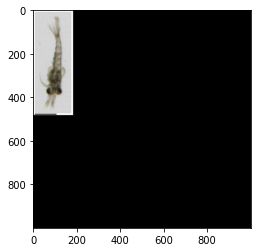

In [41]:
test_image = dataset.sel(concat_dim=21)
test_image = test_image['raster'].compute().values[:,:,:]
plt.imshow(test_image)

## Model predictions

Now let's use the loaded model on the test image data we found in the via catalog.

In [42]:
model.predict(test_image)

'switch : 5.40%'

As you can see, this model has given a prediction of the test image, with a confidence score. Check out the code in the model repo to see how this was determined!